In [1]:
#Data preprocessing is done manually

In [168]:
#Part 1 - Building the CNN
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [169]:
#initializing the CNN
classifier = Sequential()

In [170]:
#step 1 - Convolution
#Input image (X) feature detectors  = feature maps
classifier.add(Convolution2D(32,3,3, input_shape=(64,64,3),activation='relu'))#32 feature detectors of 3x3 dimensions


In [171]:
#step 2 - pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [147]:
'''
#adding a 2nd Convolution Layer || no need of input_shape par
classifier.add(Convolution2D(64,3,3, activation='relu'))#32 feature detectors of 3x3 dimensions
classifier.add(MaxPooling2D(pool_size = (2,2)))'''

"\n#adding a 2nd Convolution Layer || no need of input_shape par\nclassifier.add(Convolution2D(64,3,3, activation='relu'))#32 feature detectors of 3x3 dimensions\nclassifier.add(MaxPooling2D(pool_size = (2,2)))"

In [172]:
#step 3 - Flattening
classifier.add(Flatten()) #to convert the arrays to a single vector

In [173]:
#step 4 - Full Connection
classifier.add(Dense(128, activation='relu'))

classifier.add(Dense(1, activation='sigmoid'))

In [174]:
#compiling the CNN
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [175]:
#part 2 - Fitting the CNN into the images


In [176]:
from keras.preprocessing.image import ImageDataGenerator


In [177]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [178]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [179]:
training_set = train_datagen.flow_from_directory(
        'dataset/training_set', #path of the dataset
        target_size=(64, 64), #size of the images
        batch_size=32,        #No. of images to go thru CNN bfr weight adijustment
        class_mode='binary')


Found 8000 images belonging to 2 classes.


In [180]:
test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')


Found 2000 images belonging to 2 classes.


In [182]:
#with only one convolution layer
classifier.fit(
        training_set,
        epochs=25,
      batch_size=32,
        validation_data=test_set,
       )

Epoch 1/25
250/250 [==============================] - 26s 104ms/step - loss: 0.6891 - accuracy: 0.5613 - val_loss: 0.6175 - val_accuracy: 0.6735
Epoch 2/25
250/250 [==============================] - 26s 103ms/step - loss: 0.6193 - accuracy: 0.6528 - val_loss: 0.6420 - val_accuracy: 0.6290
Epoch 3/25
250/250 [==============================] - 25s 100ms/step - loss: 0.5771 - accuracy: 0.6961 - val_loss: 0.5935 - val_accuracy: 0.6905
Epoch 4/25
250/250 [==============================] - 25s 102ms/step - loss: 0.5668 - accuracy: 0.7119 - val_loss: 0.5821 - val_accuracy: 0.6970
Epoch 5/25
250/250 [==============================] - 26s 105ms/step - loss: 0.5514 - accuracy: 0.7205 - val_loss: 0.5684 - val_accuracy: 0.7085
Epoch 6/25
250/250 [==============================] - 26s 105ms/step - loss: 0.5285 - accuracy: 0.7283 - val_loss: 0.5552 - val_accuracy: 0.7145
Epoch 7/25
250/250 [==============================] - 27s 108ms/step - loss: 0.5221 - accuracy: 0.7376 - val_loss: 0.5322 - val_ac

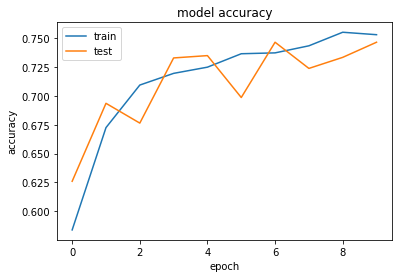

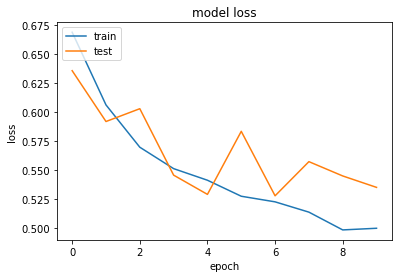

In [184]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [191]:
classifier.save('catdog_cnn_model.h5')

In [194]:
import numpy as np
from keras.preprocessing import image
test_image =image.load_img('C:/Users/Raahul John/Documents/cat.jpg',target_size =(64,64))
test_image =image.img_to_array(test_image)
test_image =np.expand_dims(test_image, axis =0)
result = classifier.predict(test_image)
if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

cat
